# Regresión Logística Incompleta

Esta hoja Colaboratory está preparada para que puedas completar tu código del entrenamiento de la Regresión logística.

**Recuerda que para guardar tus cambios deberás guardar una copia de esta hoja, por ejemplo, en tu cuenta de Google Drive. A partir de entonces, debieras acceder a tu copia. No a esta versión.**

¡Suerte y Ánimo!

## Funciones para el Entrenamiento y Predicción de la Regresión Logística

En la siguiente celda debes completar las funciones para el funcionamiento y entrenamiento del modelo de Regresión Logística. Es la única celda donde debes completar código, pues el resto de celdas simplemente invocan a las funciones aquí definidas.

Observa particularmente los comentarios con la etiqueta TODO (to-do, por-hacer)

In [1]:
from tqdm import tqdm  # Para mostrar una barra de progreso
from IPython import display; # Para poder borrar la salida de las celdas, y presentar gráficos del progreso poco a poco
import matplotlib.pyplot as plt # Para dibujar gráficas
import numpy as np # Para el cálculo matemático sobre vectores y matrices


def show_progress(loss_output, ratio_errors_data, max_iterations):
  """
  Esta función simplemente muestra el progreso del entrenamiento de la Red en un gráfico.
  También presenta el error log. actual, el mínimo en algún momento,
  el porcentaje de errores actual, y el mínimo porcentaje de errore sen algún momento.

  NO DEBES MODIFICAR NADA EN ESTA FUNCIÓN.

  :param loss_output: lista con los valores de error log a mostrar en la gráfica
  :param ratio_errors_data: lista con el porcentaje de errores de predicción a mostrar en la gráfica
  :param max_iterations: Entero. Número máximo de iteraciones de entrenamiento. Se usara para fijar el rango del eje x de la gráfica
  :return: None
  """
  fig, ax1 = plt.subplots();
  ax2 = plt.gca().twinx();
  plt.title('Error log. y Número de errores');
  plt.xlabel('Iteración');
  ax1.set_ylabel('Log Error');
  ax2.set_ylabel('Ratio errors');
  ax1.set_yscale("log");
  ax1.set_xlim([0, max_iterations]);
  ax2.set_xlim([0, max_iterations]);
  ax2.set_ylim([0, max(ratio_errors_data)]);
  fig = plt.gcf();
  ax1.plot(loss_output, label='Error log.');
  ax2.plot(ratio_errors_data, label='Ratio errors', color='orange');
  lines_1, labels_1 = ax1.get_legend_handles_labels();
  lines_2, labels_2 = ax2.get_legend_handles_labels();
  lines = lines_1 + lines_2;
  labels = labels_1 + labels_2;
  ax1.legend(lines, labels, loc='upper right');

  _ = display.clear_output(wait=True);
  _ = display.display(fig);

  display.display('Current Error log.: {:.5f} / Min Error log.: {:.5f}'.format(loss_output[-1], np.min(loss_output)));
  display.display('Current Ratio of errors: {:.5f}% / Min Ratio of errors: {:.5f}%'.format(ratio_errors_data[-1]*100, np.min(ratio_errors_data)*100));
  plt.close('all');
  plt.clf();



def sigmoid(Z):
  """
  Función sigmoide.
  
  DEBES COMPLETAR ESTA FUNCIÓN

  :param Z: ndarray con los valores a los que se le desea aplicar la sigmoide
  :return: ndarray con los valores resultado
  """
  ############################
  # TODO - Inicio
  #
  # Completa la fórmula de la función sigmoide reemplazando los puntos suspensivos por el resto de la expresión
  # Recuerda que no necesitas hacer nada especial para tratar con ndarray de valores. Numpy lo hace por ti.
  # Por ello, basta con que escribas la función usando directamente Z, sin usar ningún bucle for,
  # y usando la función np.exp para la exponencia.
  ############################
  result = 1. / (1 + np.exp(-Z))
  ############################
  # TODO - Fin
  ############################
  return result



def protected_sigmoid(Z):
  """
  Función sigmoide protegida. Esta función simplemente engloba la anterior y la
  protege frente a valores de Z que pudieran producir un overflow en el 
  cálculo de la exponencial. Es decir, un valor demasiado alto (negativo) de Z
  podría hacer que el cálculo de np.exp(-Z) no fuese representable en el
  programa. Esta función simplemente evita ese caso.

  NO DEBES MODIFICAR NADA EN ESTA FUNCIÓN.

  :param Z: ndarray con los valores a los que se le desea aplicar la sigmoide
  :return: ndarray con los valores resultado
  """
  assert type(Z) == np.ndarray, 'La función protected_sigmoid sólo acepta arrays de numpy, no ' + str(type(Z))
  aux = np.where(-Z > np.log(np.finfo(Z.dtype).max), np.nan, Z)
  result = sigmoid(aux)
  return np.where(-Z > np.log(np.finfo(Z.dtype).max), 0.0, result)



def logistic_reg_prediction(X, W, b):
  """
  Función que usa el modelo de Regresión Logística para predecir la clase
  de los patrones X de entrada

  DEBES COMPLETAR ESTA FUNCIÓN

  :param X: ndarray con los valores de los atributos del conjunto de patrones de los que se quiere saber la predicción.
  :param W,b: parámetros del modelo
  :return: (predictions, Z, A), donde
            - predictions es un ndarray con los valores de la clase predicha (0 o 1) para los patrones en X
            - Z es un ndarray con los valores intermedios calculados por el modelo
            - A es un ndarray con los valores de activación del modelo
  """

  # Obtener el número de atributos y ejemplos en el conjunto de patrones
  num_features = X.shape[0]
  num_patterns = X.shape[1]

  ############################
  # TODO - Inicio
  #
  # Completa el siguiente código, reemplazando los puntos suspensivos,
  # con las operaciones para la propagación de la información de entrada
  # hacia la salida.
  # Recuerda:
  #   - Z debe ser el producto del vector de parámetros W por X, más el escalar b
  #   - A debe ser la salida de la neurona. Utiliza la función protected_sigmoid(Z)
  #
  #   - Aparte de eso, hemos añadido las instrucciones assert para verificar
  #       que las operaciones dan como resultado los vectores y matrices
  #       de dimensiones correctas
  ############################
  Z = np.sum(W * X, axis=0) + b
  assert Z.shape == (1,num_patterns), 'Z.shape es ' + str(Z.shape) + ' y debería ser (1,' + str(num_patterns) + ')'
  A = protected_sigmoid(Z)
  assert A.shape == (1,num_patterns), 'A.shape es ' + str(A.shape) + ' y debería ser (1,' + str(num_patterns) + ')'
  ############################
  # TODO - Fin
  ############################
  return np.round(A), Z, A



def logistic_reg_training(X, Y, alpha=0.00001, num_iterations = 100):
  """
  FUNCIÓN DE ENTRENAMIENTO DE LA REGRESIÓN LOGÍSTICA.

  DEBES COMPLETAR ESTA FUNCIÓN

  :param X: ndarray con los valores de los atributos del conjunto de entrenamiento
  :param Y: ndarray vector con los valores del atributo objetivo
  :param alpha: Hiperparámetro velocidad de aprendizaje.
  :param num_iterations: Número de iteraciones de entrenamiento.
  :return: (W, b, loss_output, ratio_errors): W y b son los parámetros del modelo. loss_output
           es una lista con los errores log del modelo con respecto a las iteraciones.
           ratio_errors es una lista con el porcentaje de errores del modelo.
  """

  # Inicializamos la semilla de números aleatorios para que siempre se produzca
  # la misma secuencia de los mismos. Esto lo utilizamos sólo para que obtengas
  # los resultados que el cuestionario de evaluación acepta como correctos.
  # Por ello, NO DEBES realizar llamadas a np.random
  #
  # Una implementación real de esta función no tendría la siguiente instrucción.
  np.random.seed(1)


  # Obtener el número de atributos y ejemplos en el conjunto de entrenamiento
  num_features = X.shape[0]
  num_patterns = X.shape[1]


  # Inicialización de los parámetros del modelo
  init_factor = 0.01
  W = np.random.uniform(low=-init_factor, high=init_factor, size=num_features).reshape((num_features, 1))
  b = np.zeros((1,1))

  # Variables donde se almacenarán las listas de valores de errores del modelo
  loss_output = []
  ratio_errors = []

  # Esta constante es sólo para evitar errores al calcular el logaritmo de 0
  epsilon = 1e-100


  # BUCLE PRINCIPAL PARA EL ENTRENAMIENTO
  for i in tqdm(range(num_iterations)):

    # FORWARD PROPAGATION
    # Está programado en la función anterior
    Y_pred, Z, A = logistic_reg_prediction(X, W, b)

    ############################
    # TODO - Inicio
    #
    # Completa el siguiente código para el cálculo del error log.
    # Se ha completado la primera parte de la expresión. Debes reemplazar
    # los puntos suspensivos con el resto de la expresión.
    ############################
    c = np.mean(-Y * np.log(A + epsilon) - (1 - Y) * np.log(1 - A + epsilon))
    ############################
    # TODO - Fin
    ############################
    loss_output.append(c)


    #CÁLCULO DE LOS ERRORES COMETIDOS
    # Y_pred = logistic_reg_prediction(X, W, b)
    ratio_errors.append(np.sum(np.abs(Y - Y_pred)) / Y.shape[1])

    # Refrescar la gráfica de vez en cuando
    if i % 99 == 0:
      show_progress(loss_output, ratio_errors, num_iterations)


    #BACKWARD PROPAGATION
    ############################
    # TODO - Inicio
    #
    # Completa el siguiente código, reemplazando los puntos suspensivos,
    # con las operaciones para la propagación hacia atrás de la información de error.
    # Revisa las fórmulas usadas en los vídeos, y los comentarios en las fé de errores.

    # Aparte de eso, hemos añadido las instrucciones assert para verificar
    # que las operaciones dan como resultado los vectores y matrices
    # de dimensiones correctas
    ############################
    dZ = A - Y
    assert dZ.shape == Z.shape, 'dZ.shape es ' + str(dZ.shape) + ' y debería ser ' + Z.shape
    dW = np.matmul(X, dZ.T) / num_patterns
    assert dW.shape == W.shape, 'dW.shape es ' + str(dW.shape) + ' y debería ser ' + W.shape
    db = np.sum(dZ, axis=1, keepdims=True)/num_patterns
    assert db.shape == (1,1), 'db.shape es ' + str(db.shape) + ' y debería ser (1,1)'
    W = W - alpha * dW
    assert W.shape, 'W.shape es ' + str(W.shape) + ' y debería ser (' + str(num_features) + ',1)'
    b = b - alpha * db
    assert b.shape == (1,1), 'b.shape es ' + str(b.shape) + ' y debería ser (1,1)'
    ############################
    # TODO - Fin
    ############################

  return W,b,loss_output,ratio_errors




## Conjunto de datos de Infartos de Miocardio

### Lectura de datos

La siguiente celda se encarga de obtener los datos del repositorio UCI (un repositorio con muchos conjuntos de datos de todo tipo).

Vamos a trabajar con un conjunto de datos sobre casos de infartos de miocardio:

**Myocardial infarction complications Data Set**
(https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications)

Por ahora, lo que nos interesa saber es que las características de los casos
son de tipo numérico, son 123, y la característica objetivo toma ocho
valores. Sin embargo, transformaremos el dataset para considerar el valor 0
como "sin complicaciones", y el resto como "con complicaciones".

In [3]:
%%capture
# La instrucción anterior omite mensajes que producen las intrucciones en esta
# celda. No son necesarios si todo va bien, en particular, si la siguiente celda
# se ejecuta sin problemas.

# Obtener el fichero de datos del respositorio UCI
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/00579/MI.data

# Cargar los datos
data = np.genfromtxt('MI.data',delimiter=',')
num_features = data.shape[1]-1
num_patterns = data.shape[0]

# Éstas son las características de los casos
X = data[:,0:num_features].T

# El conjunto de datos tiene algunos valores perdidos. Los vamos a reemplazar por -1
np.nan_to_num(X, copy=False, nan=-1)

# Y éstos son los valores del atributo objetivo
# Fíjate en que realizamos una transformación para marcar si hubo o no
# complicaciones ( > 0)
Y = np.where(data[:, num_features].reshape((1,num_patterns)) > 0, 1, 0)

In [4]:
# Imprimimos alguna información del dataset
print('El conjunto de datos tiene', num_patterns,
      'patrones con', num_features, 'atributos cada uno')
print('El atributo objetivo sólo presenta los valores', np.unique(Y))
print(np.sum(Y), '({:.3f}%)'.format(100*np.sum(Y)/Y.shape[1]), ' con valor 1, y ',
      Y.shape[1]-np.sum(Y[:,:]), '({:.3f}%)'.format(100*(Y.shape[1]-np.sum(Y[:,:]))/Y.shape[1]),
      ' con valor 0.', sep='')

print('\nLos valores de los 10 primeros atributos de los seis primeros '\
      'patrones (columnas) del dataset son:')
print(X[0:10,0:6])

print('\nLos seis primeros valores del atributo objetivo son:')
print(Y[:,0:6])

El conjunto de datos tiene 1700 patrones con 123 atributos cada uno
El atributo objetivo sólo presenta los valores [0 1]
271(15.941%) con valor 1, y 1429(84.059%) con valor 0.

Los valores de los 10 primeros atributos de los seis primeros patrones (columnas) del dataset son:
[[ 1.  2.  3.  4.  5.  6.]
 [77. 55. 52. 68. 60. 64.]
 [ 1.  1.  1.  0.  1.  1.]
 [ 2.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  2.]
 [ 2.  0.  2.  2.  2.  1.]
 [-1.  0. -1. -1. -1. -1.]
 [ 3.  0.  2.  2.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.]]

Los seis primeros valores del atributo objetivo son:
[[0 0 0 0 0 0]]


### Entrenamiento en el dataset de infartos de miocardio

A continuación aplicaremos el entrenamiento del modelo sobre el dataset de casos de infarto de miocardio.

Para que tengas alguna orientación, tu modelo debería alcanzar alrededor del **10% de ratio de errores**. No mucho más. No mucho menos.

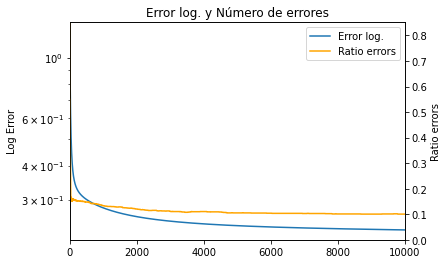

'Current Error log.: 0.23195 / Min Error log.: 0.23195'

'Current Ratio of errors: 10.05882% / Min Ratio of errors: 10.05882%'

100%|██████████| 10000/10000 [01:16<00:00, 130.36it/s]


<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

# Entrenamiento
W,b,loss_output,num_errors = logistic_reg_training(X,Y, alpha = 0.00001, num_iterations = 10000)

In [6]:
# Comprueba que realmente realiza una predicción correcta
Y_pred,_,_ = logistic_reg_prediction(X, W, b)
print('El número de errores es: {}({:.5f}%)'.format(np.sum(np.abs(Y - Y_pred)),
                                                    np.sum(np.abs(Y - Y_pred)) / Y.shape[1] * 100))

El número de errores es: 171.0(10.05882%)


## Conjunto de datos sobre dígitos escritos a mano

En este caso, vamos a utilizar un conjunto de datos de dígitos escritos a mano. Por curiosidad, te sugiero que le eches un vistazo al fichero optdigits-orig.tra que se encuentra dentro del fichero en https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits-orig.tra.Z

Aunque en dicho conjunto de datos se encuentran dígitos del 0 al 9, nosotros intentaremos entrenar un modelo de regresión logística para ver si puede detectar los dígitos que corresponden a números primos, es decir, el 2, el 3, el 5 y el 7.


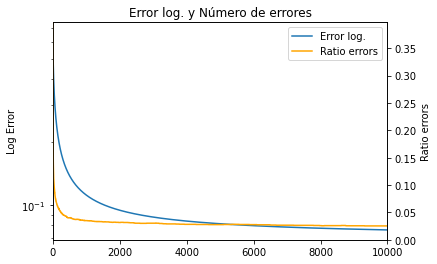

'Current Error log.: 0.07614 / Min Error log.: 0.07614'

'Current Ratio of errors: 2.53727% / Min Ratio of errors: 2.53727%'

100%|██████████| 10000/10000 [00:39<00:00, 250.78it/s]


<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt

# Hand-written digits
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra &> /dev/null
# https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

# Obtener los datos
data = np.genfromtxt('optdigits.tra',delimiter=',')
num_features = data.shape[1]-1
num_patterns = data.shape[0]
X_2 = data[:,0:num_features].T

# Marcar los patrones que corresponden a números primos
Y_2 = np.where((data[:,num_features] == 2) | (data[:,num_features] == 3) |
               (data[:,num_features] == 5) |
               (data[:,num_features] == 7), 1, 0).reshape((1,num_patterns))

# Entrenamiento
_,_,loss_output,num_errors_nums = logistic_reg_training(X_2,Y_2, alpha=0.001, num_iterations=10000)

## Una última prueba con un conjunto de datos complicado

En la siguiente celda se va a generar un conjunto de datos de forma aleatoria. Después de mostrarlo visualmente, evaluaremos la capacidad del modelo de Regresión Logística de aprender la clase de dicho conjunto de datos.

A partir de la visualización del conjunto, observa que se podrián diferenciar 7 regiones del espacio, que tienen tamaños "similares", en las que 2 tienen un claro solapamiento y las otras 5, o no solapamiento o muy bajo. Por tanto, sería esperable que un humano consiguiese un porcentaje de acierto de alrededor de 5/7, es decir 70%. O lo que es lo mismo, un error alrededor del 30%.

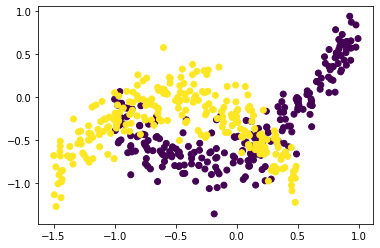

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Inicializamos la semilla de números aleatorios para que siempre se produzca
# la misma secuencia de los mismos
np.random.seed(1)

num_features = 2
num_patterns = 500

X_3 = np.random.uniform(-1,1, num_features * num_patterns).reshape((num_features, num_patterns))
X_3[1,:int(num_patterns / 2)] = (X_3[0,:int(num_patterns / 2)]+0.25)**2 + \
    np.random.randn(int(num_patterns / 2))/5 - 0.75
X_3[0,int(num_patterns / 2):] -= 0.5
X_3[1,int(num_patterns / 2):] = -(X_3[0,int(num_patterns / 2):]+0.5)**2 + \
    np.random.randn(int(num_patterns / 2))/5
Y_3 = np.repeat([0,1], num_patterns / 2).reshape((1, num_patterns))

plt.scatter(X_3[0,:], X_3[1,:], c=Y_3);

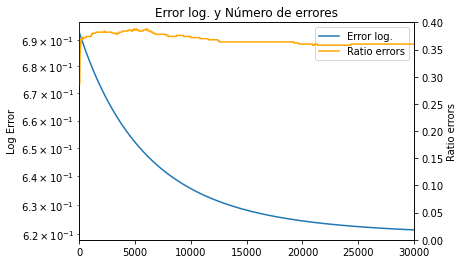

'Current Error log.: 0.62137 / Min Error log.: 0.62137'

'Current Ratio of errors: 36.00000% / Min Ratio of errors: 28.60000%'

100%|██████████| 30000/30000 [00:54<00:00, 555.50it/s]


<Figure size 432x288 with 0 Axes>

In [ ]:
# Entrenamiento
W,b,loss_output,num_errors_compl = logistic_reg_training(X_3,Y_3, alpha=0.001, num_iterations=30000)


In [2]:
np.round(protected_sigmoid(np.array([-709.0])), 3)

array([0.])

In [3]:
protected_sigmoid(np.array([-709.0]))

array([1.21678075e-308])

In [4]:
np.round(loss_output[0], 3)

0.67